***Deep Learning Assignment 1*** 

***NAME*** Shubham Sharma
***SID** 862394567

***Task 1) Write the code for downloading and formatting the data.***


***Write the code for downloading and formatting the data.***

In [54]:
import numpy as np
from keras.datasets import mnist

def loadAndPreprocessMnist():
    """Loading MNIST dataset"""
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    """ Reshaping and scaling down the input features """
    X_train = X_train.reshape(X_train.shape[0], -1).T / 255
    X_test = X_test.reshape(X_test.shape[0], -1).T / 255
    
    """One-Hot Encoding"""
    y_train_oh = np.eye(10)[y_train].T
    y_test_oh = np.eye(10)[y_test].T

    # # Print one-hot encoding validation
    # print(f"y_train: {y_train[0]}, y_train_oh: {y_train_oh[:,0]}")
    # print(f"y_test: {y_test[0]}, y_test_oh: {y_test_oh[:,0]}")

    return X_train, y_train_oh, X_test, y_test_oh, y_train, y_test


""" Get MNIST dataset """
X_train, y_train_oh, X_test, y_test_oh, y_train, y_test  = loadAndPreprocessMnist()
for i in range(5):
  print(i,"row of y_train_oh:", y_train_oh[:, i],"Value of y_train is ",y_train[i])
  print(i,"row of y_test_oh:", y_test_oh[:, i], "Value of y_test is ",y_test[i])

0 row of y_train_oh: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Value of y_train is  5
0 row of y_test_oh: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Value of y_test is  7
1 row of y_train_oh: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Value of y_train is  0
1 row of y_test_oh: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] Value of y_test is  2
2 row of y_train_oh: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Value of y_train is  4
2 row of y_test_oh: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Value of y_test is  1
3 row of y_train_oh: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Value of y_train is  1
3 row of y_test_oh: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Value of y_test is  0
4 row of y_train_oh: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Value of y_train is  9
4 row of y_test_oh: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Value of y_test is  4


***Task 1 Answer) *** In the first task, we download the MNIST dataset using "Keras". Then we scale the pixel values of the images to the range of 0 to 1 by dividing them by 255 for both the training and test sets. After that, we perform one-hot encoding on the target variable as shown above.

***Task 2) (5 pts) Write the code for minibatch SGD implementation for your linear MNIST classifier.***

In [68]:
"""Define quadratic loss function"""
def loss(W, X, Y):
  # print("shape of W is ",W.shape,"shape of X_batch",X_batch.shape)
    y_p = y_p = np.dot(W, X)
    y_pred = np.argmax(y_p, axis=0)
    y_true = np.argmax(Y, axis=0)
    return np.mean(np.sum((y_pred - y_true) ** 2, axis=0) / 2)

"""accuracy function"""
def accuracy(W, X, Y):
  # print("shape of W is ",W.shape,"shape of X_batch",X_batch.shape)
    y_p = np.dot(W, X)
    y_pred = np.argmax(y_p, axis=0)
    y_true = np.argmax(Y, axis=0)
    return np.mean(y_pred == y_true)

def sgd(X_train, y_train_oh, X_test, y_test_oh, learning_rate, batch_size, iterations):

    """ Mini Batch Stochastic Gradient Descent Training"""
    train_loss_data = []
    train_acc_data = []
    test_acc_data = []

    """Initializing W Matrix"""
    W = np.zeros((10, 784))
    i=0
    while i < iterations:
      """ Get Batch Range"""
      batch_range = np.random.choice(X_train.shape[1], batch_size, replace=True)

      """ Get Batch Data from X and Y """
      X_b = X_train[:, batch_range]
      y_b = y_train_oh[:, batch_range]

      """ Prediction"""
      # print("shape of W is ",W.shape,"shape of X_batch",X_batch.shape)
      y_predict = np.dot(W, X_b)

      """ Calculate the Gradiant"""
      y_diff  = y_predict - y_b
      # print("shape of W is ",W.shape,"shape of X_batch",X_batch.shape)
      gradiant_value = np.dot(y_diff, X_b.T)
      gradiant_value = gradiant_value / batch_size

      """Updating W"""
      W = W - learning_rate * gradiant_value

      """Calculating Loss and Accuracy"""
      training_l = loss(W, X_train, y_train_oh)
      training_a = accuracy(W, X_train, y_train_oh)
      test_acc = accuracy(W, X_test, y_test_oh)

      train_loss_data.append(training_l)
      train_acc_data.append(training_a)
      test_acc_data.append(test_acc)

      if i % 100 == 0:
        print(f"Iteration: {i} Train Loss: {training_l} Train Accuracy: {training_a*100} Test Accuracy: {test_acc*100}")
      i+=1
    
    return train_loss_data, train_acc_data, test_acc_data

In [71]:
batch_size  = 100
learning_rate = .001
iterations = 500

print(f"Batch Size: {batch_size}")
train_losses, train_accs, test_accs = sgd(X_train, y_train_oh, X_test, y_test_oh, learning_rate, batch_size, iterations)

Batch Size: 100
Iteration: 0 Train Loss: 333438.5 Train Accuracy: 35.93 Test Accuracy: 36.54
Iteration: 100 Train Loss: 148098.0 Train Accuracy: 74.42333333333333 Test Accuracy: 75.46000000000001
Iteration: 200 Train Loss: 143561.0 Train Accuracy: 75.51 Test Accuracy: 76.84
Iteration: 300 Train Loss: 132084.0 Train Accuracy: 77.68833333333333 Test Accuracy: 79.0
Iteration: 400 Train Loss: 126632.5 Train Accuracy: 78.45833333333333 Test Accuracy: 79.54


***Task 2 Answer)*** In Task 2 we have implemented a mini-batch stochastic gradient descent training method for  multi-class classification for the MNIST dataset. We have created sgd() function for linear classifier with 

Learning rate = .001
Batch size = 100
Number of iterations = 500

We have initializes W with zeros.

Finally, it returns the arrays of training loss, training accuracy, and testing accuracy for plotting and analysis.

*** Task 3 *** ****(7 pts) The role of batch size: Run your code with batch sizes B = 1, 10, 100, 1000. For each batch size,
• determine a good choice of learning rate
• pick ITR sufficiently large to ensure the (approximate) convergence of the training loss
• Plot the progress of training loss (y-axis) as a function of the iteration counter t (x-axis)
• Report how long the training takes (in seconds).
• Plot the progress of the test accuracy (y-axis) as a function of the iteration counter t (x-axis)****

Batch Size: 1 and Learning rate: 0.1
Iteration: 0 Train Loss: 608322.0 Train Accuracy: 11.236666666666666 Test Accuracy: 11.35
Iteration: 100 Train Loss: 882786.0 Train Accuracy: 9.678333333333333 Test Accuracy: 9.99
Iteration: 200 Train Loss: 865186.0 Train Accuracy: 9.916666666666666 Test Accuracy: 10.09
Iteration: 300 Train Loss: 614802.0 Train Accuracy: 10.941666666666666 Test Accuracy: 11.17
Iteration: 400 Train Loss: 644698.0 Train Accuracy: 15.004999999999999 Test Accuracy: 15.53
Iteration: 500 Train Loss: 871090.0 Train Accuracy: 9.915000000000001 Test Accuracy: 10.09
Iteration: 600 Train Loss: 870434.0 Train Accuracy: 9.915000000000001 Test Accuracy: 10.09
Iteration: 700 Train Loss: 870434.0 Train Accuracy: 9.915000000000001 Test Accuracy: 10.09
Iteration: 800 Train Loss: 733994.0 Train Accuracy: 13.033333333333333 Test Accuracy: 13.29
Iteration: 900 Train Loss: 688146.0 Train Accuracy: 17.861666666666668 Test Accuracy: 18.42
(Learning Rate 0.1) Batch Size 1: Training time 369

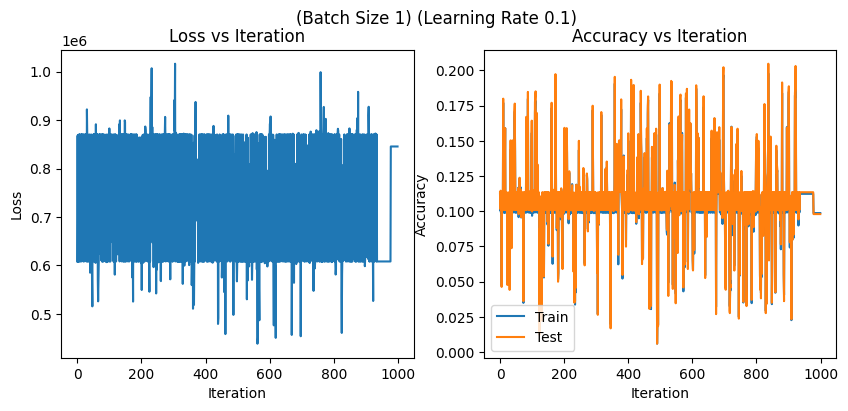

<ipython-input-72-11c95e43c0da>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Batch Size: 10 and Learning rate: 0.1
Iteration: 0 Train Loss: 586401.5 Train Accuracy: 19.173333333333336 Test Accuracy: 19.259999999999998
Iteration: 100 Train Loss: 444906.0 Train Accuracy: 10.441666666666666 Test Accuracy: 10.280000000000001
Iteration: 200 Train Loss: 444906.0 Train Accuracy: 10.441666666666666 Test Accuracy: 10.280000000000001
Iteration: 300 Train Loss: 444906.0 Train Accuracy: 10.441666666666666 Test Accuracy: 10.280000000000001
Iteration: 400 Train Loss: 444906.0 Train Accuracy: 10.441666666666666 Test Accuracy: 10.280000000000001
Iteration: 500 Train Loss: 444906.0 Train Accuracy: 10.441666666666666 Test Accuracy: 10.280000000000001
Iteration: 600 Train Loss: 444906.0 Train Accuracy: 10.441666666666666 Test Accuracy: 10.280000000000001
Iteration: 700 Train Loss: 444906.0 Train Accuracy: 10.441666666666666 Test Accuracy: 10.280000000000001
Iteration: 800 Train Loss: 845558.0 Train Accuracy: 9.871666666666666 Test Accuracy: 9.8
Iteration: 900 Train Loss: 845558.0

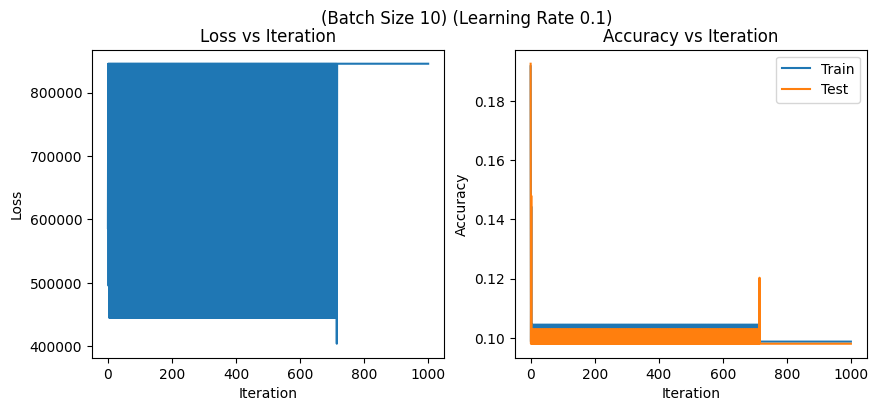

<ipython-input-72-11c95e43c0da>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Batch Size: 100 and Learning rate: 0.1
Iteration: 0 Train Loss: 840097.5 Train Accuracy: 14.358333333333334 Test Accuracy: 14.62
Iteration: 100 Train Loss: 845558.0 Train Accuracy: 9.871666666666666 Test Accuracy: 9.8
Iteration: 200 Train Loss: 845558.0 Train Accuracy: 9.871666666666666 Test Accuracy: 9.8
Iteration: 300 Train Loss: 845558.0 Train Accuracy: 9.871666666666666 Test Accuracy: 9.8
Iteration: 400 Train Loss: 845558.0 Train Accuracy: 9.871666666666666 Test Accuracy: 9.8
Iteration: 500 Train Loss: 845558.0 Train Accuracy: 9.871666666666666 Test Accuracy: 9.8
Iteration: 600 Train Loss: 845558.0 Train Accuracy: 9.871666666666666 Test Accuracy: 9.8
Iteration: 700 Train Loss: 845558.0 Train Accuracy: 9.871666666666666 Test Accuracy: 9.8
Iteration: 800 Train Loss: 845558.0 Train Accuracy: 9.871666666666666 Test Accuracy: 9.8
Iteration: 900 Train Loss: 845558.0 Train Accuracy: 9.871666666666666 Test Accuracy: 9.8
(Learning Rate 0.1) Batch Size 100: Training time 368.8249182701111 se

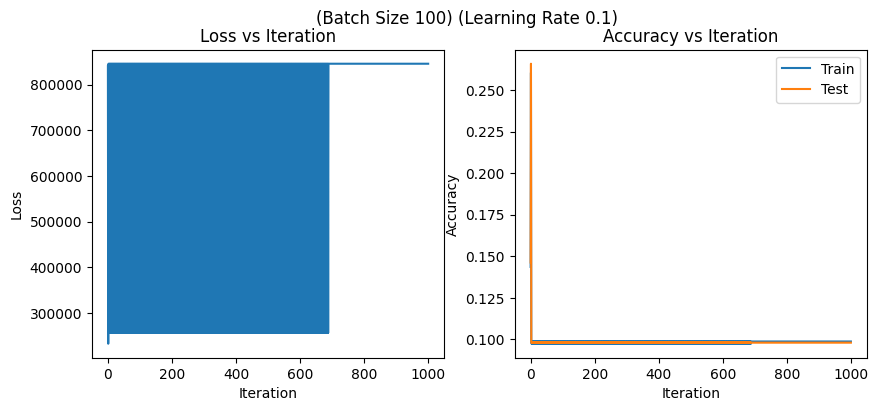

<ipython-input-72-11c95e43c0da>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Batch Size: 1000 and Learning rate: 0.1
Iteration: 0 Train Loss: 295246.5 Train Accuracy: 62.743333333333325 Test Accuracy: 62.82
Iteration: 100 Train Loss: 845558.0 Train Accuracy: 9.871666666666666 Test Accuracy: 9.8
Iteration: 200 Train Loss: 845558.0 Train Accuracy: 9.871666666666666 Test Accuracy: 9.8
Iteration: 300 Train Loss: 845558.0 Train Accuracy: 9.871666666666666 Test Accuracy: 9.8
Iteration: 400 Train Loss: 845558.0 Train Accuracy: 9.871666666666666 Test Accuracy: 9.8
Iteration: 500 Train Loss: 845558.0 Train Accuracy: 9.871666666666666 Test Accuracy: 9.8
Iteration: 600 Train Loss: 845558.0 Train Accuracy: 9.871666666666666 Test Accuracy: 9.8
Iteration: 700 Train Loss: 845558.0 Train Accuracy: 9.871666666666666 Test Accuracy: 9.8
Iteration: 800 Train Loss: 845558.0 Train Accuracy: 9.871666666666666 Test Accuracy: 9.8
Iteration: 900 Train Loss: 845558.0 Train Accuracy: 9.871666666666666 Test Accuracy: 9.8
(Learning Rate 0.1) Batch Size 1000: Training time 376.81118750572205

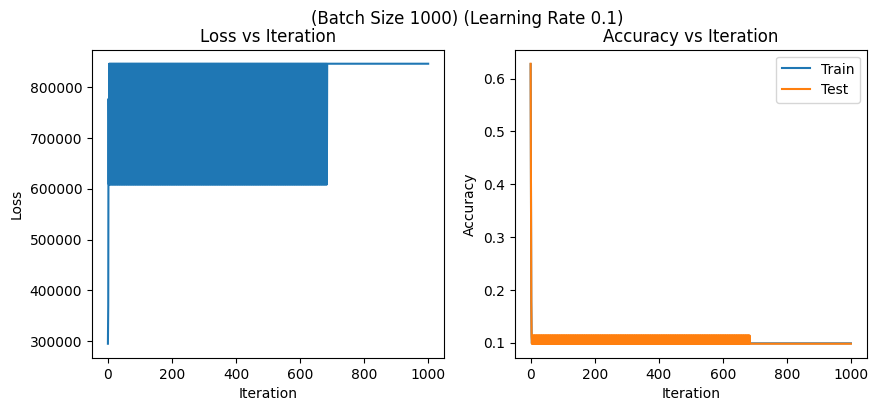

<ipython-input-72-11c95e43c0da>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Batch Size: 1 and Learning rate: 0.01
Iteration: 0 Train Loss: 256614.0 Train Accuracy: 9.736666666666666 Test Accuracy: 9.82
Iteration: 100 Train Loss: 230737.5 Train Accuracy: 57.90666666666666 Test Accuracy: 58.45
Iteration: 200 Train Loss: 176441.5 Train Accuracy: 63.10333333333333 Test Accuracy: 62.49
Iteration: 300 Train Loss: 172266.0 Train Accuracy: 65.63333333333333 Test Accuracy: 66.19
Iteration: 400 Train Loss: 167715.5 Train Accuracy: 71.31666666666666 Test Accuracy: 71.53
Iteration: 500 Train Loss: 205635.0 Train Accuracy: 61.03166666666666 Test Accuracy: 59.540000000000006
Iteration: 600 Train Loss: 188527.5 Train Accuracy: 65.07 Test Accuracy: 65.68
Iteration: 700 Train Loss: 143461.0 Train Accuracy: 68.645 Test Accuracy: 68.82000000000001
Iteration: 800 Train Loss: 120937.0 Train Accuracy: 75.23166666666667 Test Accuracy: 76.21
Iteration: 900 Train Loss: 139092.0 Train Accuracy: 72.7 Test Accuracy: 72.6
(Learning Rate 0.01) Batch Size 1: Training time 374.04678177833557

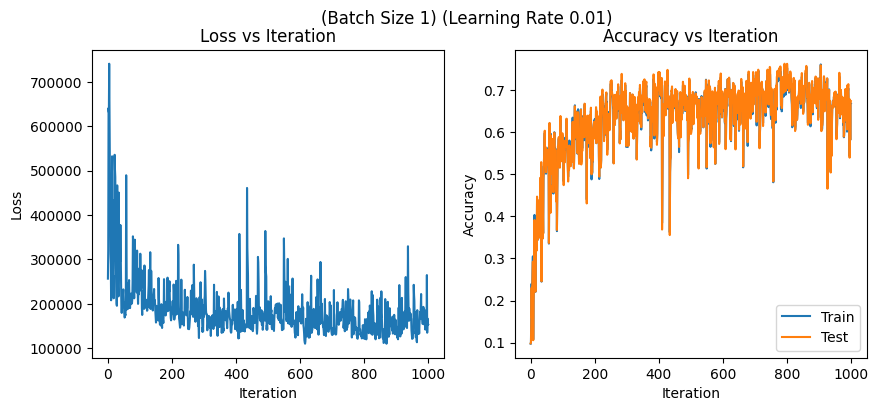

<ipython-input-72-11c95e43c0da>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Batch Size: 10 and Learning rate: 0.01
Iteration: 0 Train Loss: 338348.0 Train Accuracy: 21.363333333333333 Test Accuracy: 22.0
Iteration: 100 Train Loss: 117831.0 Train Accuracy: 77.24333333333333 Test Accuracy: 78.42
Iteration: 200 Train Loss: 111169.0 Train Accuracy: 80.30166666666668 Test Accuracy: 81.11
Iteration: 300 Train Loss: 107130.5 Train Accuracy: 81.205 Test Accuracy: 81.95
Iteration: 400 Train Loss: 100748.0 Train Accuracy: 79.81666666666666 Test Accuracy: 80.53
Iteration: 500 Train Loss: 94840.5 Train Accuracy: 83.11500000000001 Test Accuracy: 83.78
Iteration: 600 Train Loss: 87388.0 Train Accuracy: 82.75333333333333 Test Accuracy: 83.61
Iteration: 700 Train Loss: 85922.0 Train Accuracy: 83.56166666666667 Test Accuracy: 84.69
Iteration: 800 Train Loss: 85350.5 Train Accuracy: 83.68666666666667 Test Accuracy: 84.88
Iteration: 900 Train Loss: 90416.0 Train Accuracy: 81.44500000000001 Test Accuracy: 82.03
(Learning Rate 0.01) Batch Size 10: Training time 372.80540323257446 

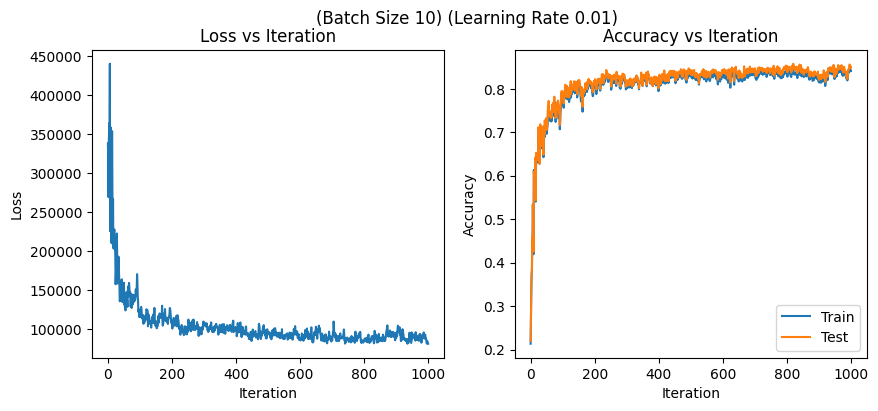

<ipython-input-72-11c95e43c0da>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Batch Size: 100 and Learning rate: 0.01
Iteration: 0 Train Loss: 285692.5 Train Accuracy: 40.153333333333336 Test Accuracy: 40.62
Iteration: 100 Train Loss: 105117.0 Train Accuracy: 80.84666666666666 Test Accuracy: 81.63
Iteration: 200 Train Loss: 95351.5 Train Accuracy: 82.87333333333333 Test Accuracy: 83.71
Iteration: 300 Train Loss: 91457.5 Train Accuracy: 83.645 Test Accuracy: 84.49
Iteration: 400 Train Loss: 87186.5 Train Accuracy: 83.82833333333333 Test Accuracy: 84.39
Iteration: 500 Train Loss: 86928.5 Train Accuracy: 84.12666666666667 Test Accuracy: 84.52
Iteration: 600 Train Loss: 90522.0 Train Accuracy: 83.74666666666667 Test Accuracy: 84.25
Iteration: 700 Train Loss: 87188.0 Train Accuracy: 84.53333333333333 Test Accuracy: 85.1
Iteration: 800 Train Loss: 85508.0 Train Accuracy: 84.62166666666666 Test Accuracy: 85.11
Iteration: 900 Train Loss: 86446.0 Train Accuracy: 84.37833333333333 Test Accuracy: 85.26
(Learning Rate 0.01) Batch Size 100: Training time 402.39366841316223 s

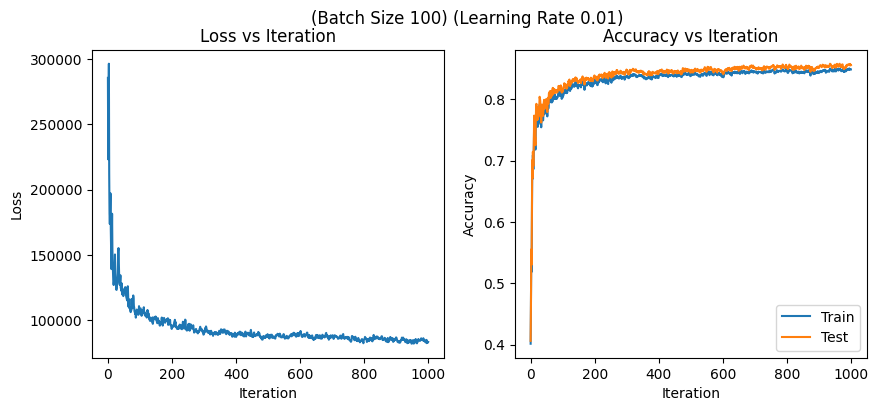

<ipython-input-72-11c95e43c0da>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Batch Size: 1000 and Learning rate: 0.01
Iteration: 0 Train Loss: 234681.0 Train Accuracy: 65.58 Test Accuracy: 65.75999999999999
Iteration: 100 Train Loss: 106579.5 Train Accuracy: 81.41666666666667 Test Accuracy: 82.31
Iteration: 200 Train Loss: 96558.0 Train Accuracy: 83.025 Test Accuracy: 83.62
Iteration: 300 Train Loss: 91568.5 Train Accuracy: 83.71166666666666 Test Accuracy: 84.28
Iteration: 400 Train Loss: 89084.0 Train Accuracy: 84.18833333333333 Test Accuracy: 84.88
Iteration: 500 Train Loss: 86829.0 Train Accuracy: 84.455 Test Accuracy: 85.13
Iteration: 600 Train Loss: 85430.5 Train Accuracy: 84.57333333333334 Test Accuracy: 85.28999999999999
Iteration: 700 Train Loss: 84288.5 Train Accuracy: 84.69666666666666 Test Accuracy: 85.36
Iteration: 800 Train Loss: 83730.0 Train Accuracy: 84.77333333333334 Test Accuracy: 85.50999999999999
Iteration: 900 Train Loss: 83413.5 Train Accuracy: 84.785 Test Accuracy: 85.55
(Learning Rate 0.01) Batch Size 1000: Training time 410.059423923492

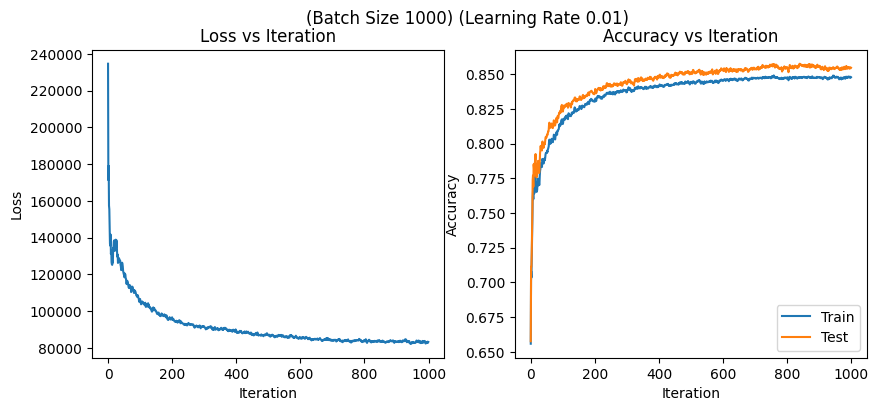

<ipython-input-72-11c95e43c0da>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Batch Size: 1 and Learning rate: 0.001
Iteration: 0 Train Loss: 870434.0 Train Accuracy: 9.915000000000001 Test Accuracy: 10.09
Iteration: 100 Train Loss: 276293.5 Train Accuracy: 49.315 Test Accuracy: 50.29
Iteration: 200 Train Loss: 197938.0 Train Accuracy: 65.03833333333333 Test Accuracy: 65.14
Iteration: 300 Train Loss: 148498.5 Train Accuracy: 71.955 Test Accuracy: 73.72999999999999
Iteration: 400 Train Loss: 175727.5 Train Accuracy: 71.555 Test Accuracy: 72.53
Iteration: 500 Train Loss: 148458.5 Train Accuracy: 72.57000000000001 Test Accuracy: 73.5
Iteration: 600 Train Loss: 143902.0 Train Accuracy: 76.87166666666667 Test Accuracy: 77.85
Iteration: 700 Train Loss: 125674.0 Train Accuracy: 78.43 Test Accuracy: 79.85
Iteration: 800 Train Loss: 164097.0 Train Accuracy: 74.07000000000001 Test Accuracy: 75.11
Iteration: 900 Train Loss: 124649.0 Train Accuracy: 77.995 Test Accuracy: 78.51
(Learning Rate 0.001) Batch Size 1: Training time 395.5991487503052 seconds



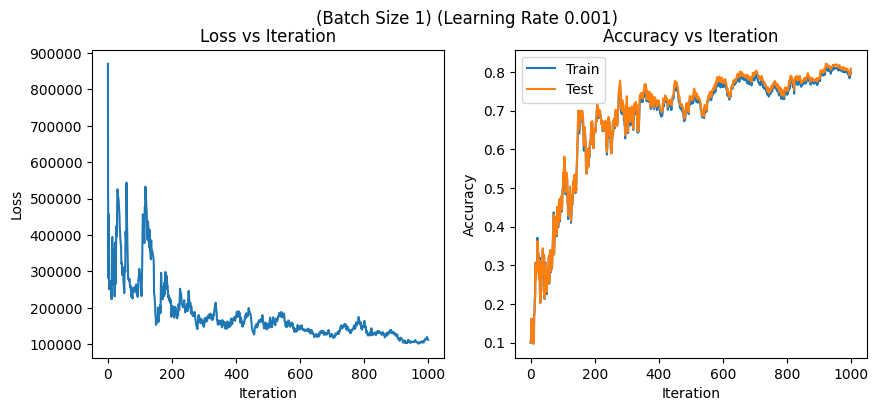

<ipython-input-72-11c95e43c0da>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Batch Size: 10 and Learning rate: 0.001
Iteration: 0 Train Loss: 830644.0 Train Accuracy: 11.74 Test Accuracy: 12.06
Iteration: 100 Train Loss: 187078.5 Train Accuracy: 71.53333333333333 Test Accuracy: 72.33000000000001
Iteration: 200 Train Loss: 140132.0 Train Accuracy: 75.075 Test Accuracy: 76.25999999999999
Iteration: 300 Train Loss: 137887.0 Train Accuracy: 76.66333333333334 Test Accuracy: 77.41
Iteration: 400 Train Loss: 134585.0 Train Accuracy: 78.05666666666666 Test Accuracy: 78.88
Iteration: 500 Train Loss: 130210.5 Train Accuracy: 78.115 Test Accuracy: 79.33
Iteration: 600 Train Loss: 114868.5 Train Accuracy: 79.75166666666667 Test Accuracy: 80.82000000000001
Iteration: 700 Train Loss: 112248.5 Train Accuracy: 80.82833333333333 Test Accuracy: 81.86
Iteration: 800 Train Loss: 110151.0 Train Accuracy: 80.74333333333334 Test Accuracy: 81.76
Iteration: 900 Train Loss: 105402.5 Train Accuracy: 80.97999999999999 Test Accuracy: 81.62
(Learning Rate 0.001) Batch Size 10: Training time

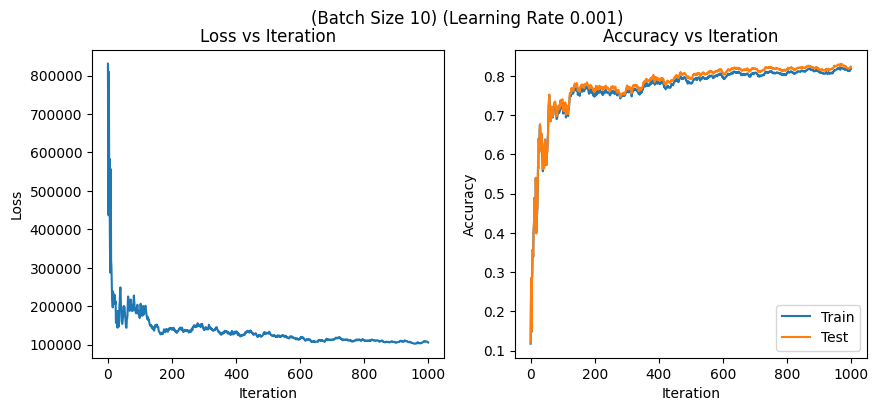

<ipython-input-72-11c95e43c0da>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Batch Size: 100 and Learning rate: 0.001
Iteration: 0 Train Loss: 227616.5 Train Accuracy: 30.759999999999998 Test Accuracy: 31.35
Iteration: 100 Train Loss: 143805.0 Train Accuracy: 74.97333333333333 Test Accuracy: 76.24
Iteration: 200 Train Loss: 138136.5 Train Accuracy: 76.93333333333334 Test Accuracy: 78.14
Iteration: 300 Train Loss: 130773.5 Train Accuracy: 77.94 Test Accuracy: 78.93
Iteration: 400 Train Loss: 128329.5 Train Accuracy: 77.92166666666667 Test Accuracy: 79.01
Iteration: 500 Train Loss: 123105.5 Train Accuracy: 79.00666666666667 Test Accuracy: 80.08
Iteration: 600 Train Loss: 117364.0 Train Accuracy: 79.36333333333333 Test Accuracy: 80.43
Iteration: 700 Train Loss: 113743.5 Train Accuracy: 80.23 Test Accuracy: 81.41000000000001
Iteration: 800 Train Loss: 108710.0 Train Accuracy: 80.73666666666666 Test Accuracy: 81.87
Iteration: 900 Train Loss: 108261.0 Train Accuracy: 81.10166666666667 Test Accuracy: 82.02000000000001
(Learning Rate 0.001) Batch Size 100: Training tim

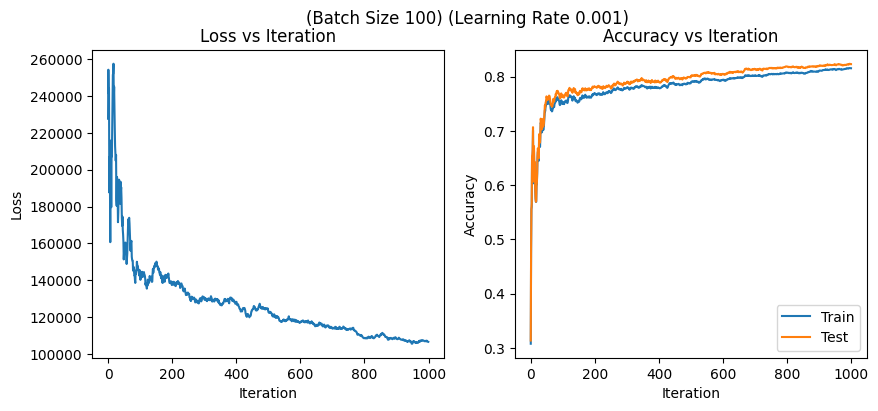

<ipython-input-72-11c95e43c0da>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Batch Size: 1000 and Learning rate: 0.001
Iteration: 0 Train Loss: 297920.5 Train Accuracy: 56.493333333333325 Test Accuracy: 56.96
Iteration: 100 Train Loss: 144761.0 Train Accuracy: 75.52333333333333 Test Accuracy: 76.55
Iteration: 200 Train Loss: 138776.0 Train Accuracy: 76.51 Test Accuracy: 77.81
Iteration: 300 Train Loss: 130362.0 Train Accuracy: 77.66833333333332 Test Accuracy: 78.73
Iteration: 400 Train Loss: 126443.5 Train Accuracy: 78.28500000000001 Test Accuracy: 79.39
Iteration: 500 Train Loss: 121340.0 Train Accuracy: 79.06833333333333 Test Accuracy: 80.10000000000001
Iteration: 600 Train Loss: 117150.5 Train Accuracy: 79.755 Test Accuracy: 80.74
Iteration: 700 Train Loss: 114078.5 Train Accuracy: 80.21333333333334 Test Accuracy: 81.24
Iteration: 800 Train Loss: 111839.5 Train Accuracy: 80.61666666666667 Test Accuracy: 81.62
Iteration: 900 Train Loss: 109778.5 Train Accuracy: 80.97333333333333 Test Accuracy: 81.96
(Learning Rate 0.001) Batch Size 1000: Training time 385.506

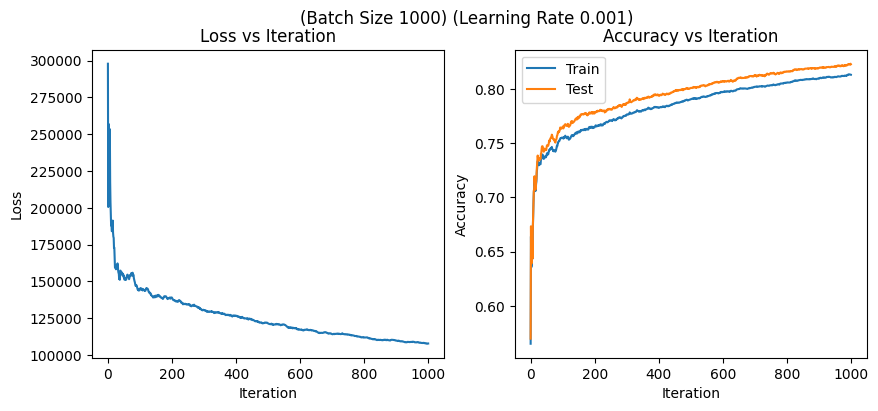

<ipython-input-72-11c95e43c0da>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


In [72]:
import time
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(columns=["learning rate", "batch size", "training accuracy", "test accuracy"])

def run_for_multiple_batch(X_train, y_train_oh, X_test, y_test_oh, lr, batch_size, iterations):
          start_time = time.time()
          train_losses, train_accs, test_accs = sgd(X_train, y_train_oh, X_test, y_test_oh, lr, batch_size, iterations)
          end_time = time.time()

          # print(f"Training Time: {end_time - start_time:.2f} seconds")
          print(f"(Learning Rate {lr}) Batch Size {batch_size}: Training time {end_time - start_time} seconds\n")


          """ Plot (loss and accuracy) vs Iteration curves """
          fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
          fig.suptitle(f"(Batch Size {batch_size}) (Learning Rate {lr})")
          ax[0].plot(train_losses)
          ax[0].set_title(f"Loss vs Iteration")
          ax[0].set_xlabel("Iteration")
          ax[0].set_ylabel("Loss")
          ax[1].plot(train_accs, label="Train")
          ax[1].plot(test_accs, label="Test")
          ax[1].set_title(f"Accuracy vs Iteration")
          ax[1].set_xlabel("Iteration")
          ax[1].set_ylabel("Accuracy")
          ax[1].legend()
          plt.show()

          return (lr, batch_size, train_accs[-1]*100, test_accs[-1]*100)
          
""" Load MNIST dataset """
X_train, y_train_oh, X_test, y_test_oh, y_train, y_test  = loadAndPreprocessMnist()

""" Seting  hyperparameters """
learning_rate = [.1,.01, .001]
batch_sizes = [1, 10, 100, 1000]
iterations = 1000

""" Run experiments with different batch sizes and Multiple learning rate to get the best accuracy"""
for lr in learning_rate:
      for batch_size in batch_sizes:
        print(f"Batch Size: {batch_size} and Learning rate: {lr}")
        lr, batch_size, train_accs, test_accs = run_for_multiple_batch(X_train, y_train_oh, X_test, y_test_oh, lr, batch_size, iterations)
        new_row = {"learning rate": lr, "batch size": batch_size, "training accuracy": train_accs, "test accuracy": test_accs}
        df = df.append(new_row, ignore_index=True)

In [73]:
df

,learning rate,batch size,training accuracy,test accuracy
0,0.100,1.0,9.871667,9.80
1,0.100,10.0,9.871667,9.80
2,0.100,100.0,9.871667,9.80
3,0.100,1000.0,9.871667,9.80
4,0.010,1.0,66.780000,67.35
5,0.010,10.0,84.050000,84.83
6,0.010,100.0,84.878333,85.58
7,0.010,1000.0,84.791667,85.47
8,0.001,1.0,79.871667,80.86
9,0.001,10.0,81.765000,82.35


***Task3 Answer*** From the above observation, we are getting maximum accuracy when the ***learning rate is 0.01 *** for batch sizes 100 and 1000. Therefore, the best choice of learning rate is 0.01. I am using 1000 iterations to train the model.



***Task 4 Answer*** When the batch size is large like in case if 1000, the algorithm is taking longer to compute the gradient of the loss function and to update the parameters of W, but each update must be more accurate because it considers a larger amount of data. Overall, the large batch size may lead to slower convergence but higher accuracy.

Where as, when the batch size is small like 1, the algorithm compute the gradient and update the parameters more frequently, which leads to speeds up in the optimization process while training. However, each update will be less accurate since it only considers a small subset of the training data. This may lead to faster convergence but with lower accuracy which we can clearly observe in our output.





***Task 5) 6 pts The role of training dataset size: Let us reduce the training dataset size. Instead of N = 50,000, let us pick a subset S′ of size N′ from the original dataset without replacement and uniformly at random. Fix batch size to B = 100. Repeat the steps above for N ′ ∈ {100, 500, 1000, 10000}. Comment on the accuracy as a function of dataset size.***

In [64]:
def run_for_multiple_subset(X_train, y_train, X_test, y_test, learning_rate, N_S):
    """ Setting batch and iterations = 1000"""
    batch_size = 100
    iterations = 1000
    for N in N_S:

        """ Getting Subset from data without replacement"""

        """Get Data"""
        (X_train, y_train), (X_test, y_test) = mnist.load_data()
        """ Getting random data"""
        np.random.seed(42)
        idx = np.random.choice(X_train.shape[0], N, replace=False)
        X_train_prime = X_train[idx, :]
        y_train_prime = y_train[idx]
        """Pre-processing"""
        X_train_prime = X_train_prime.astype('float32') / 255
        X_test = X_test.astype('float32') / 255
        X_train_prime = X_train_prime.reshape(X_train_prime.shape[0], -1).T
        X_test = X_test.reshape(X_test.shape[0], -1).T
        """One-Hot Encoding"""
        y_train_oh = np.eye(10)[y_train_prime].T
        y_test_oh = np.eye(10)[y_test].T


        """ Training Data"""
        train_losses, train_accs, test_accs = sgd(X_train_prime, y_train_oh, X_test, y_test_oh, learning_rate, batch_size, iterations)

        """ Ploting Out put"""
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
        ax[0].plot(train_losses)
        ax[0].set_title(f"Training Loss (N'={N})")
        ax[0].set_xlabel("Iteration")
        ax[0].set_ylabel("Loss")
        ax[1].plot(train_accs, label="Train")
        ax[1].plot(test_accs, label="Test")
        ax[1].set_title(f"Accuracy (N'={N})")
        ax[1].set_xlabel("Iteration")
        ax[1].set_ylabel("Accuracy")
        ax[1].legend()
        plt.show()


Iteration: 0 Train Loss: 949.0 Train Accuracy: 19.0 Test Accuracy: 13.350000000000001
Iteration: 100 Train Loss: 252.5 Train Accuracy: 77.0 Test Accuracy: 55.24
Iteration: 200 Train Loss: 127.0 Train Accuracy: 89.0 Test Accuracy: 65.46
Iteration: 300 Train Loss: 88.0 Train Accuracy: 92.0 Test Accuracy: 69.5
Iteration: 400 Train Loss: 88.0 Train Accuracy: 92.0 Test Accuracy: 70.7
Iteration: 500 Train Loss: 61.0 Train Accuracy: 95.0 Test Accuracy: 71.84
Iteration: 600 Train Loss: 32.5 Train Accuracy: 98.0 Test Accuracy: 72.72
Iteration: 700 Train Loss: 24.5 Train Accuracy: 99.0 Test Accuracy: 73.33
Iteration: 800 Train Loss: 24.5 Train Accuracy: 99.0 Test Accuracy: 73.50999999999999
Iteration: 900 Train Loss: 24.5 Train Accuracy: 99.0 Test Accuracy: 73.69


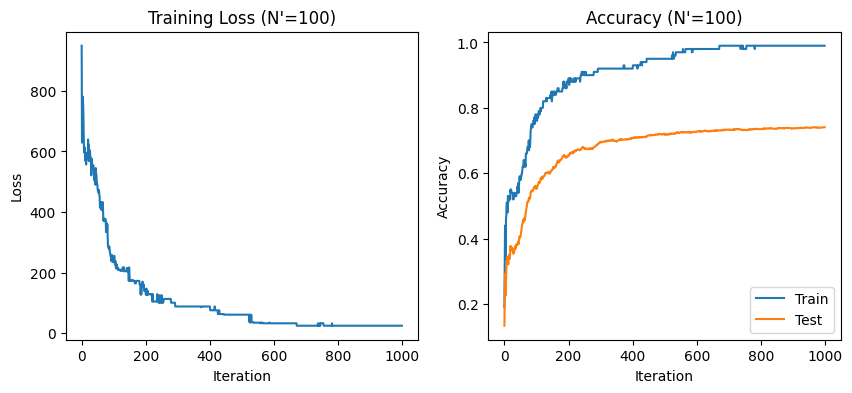

Iteration: 0 Train Loss: 3794.0 Train Accuracy: 20.8 Test Accuracy: 16.98
Iteration: 100 Train Loss: 1568.0 Train Accuracy: 70.0 Test Accuracy: 67.74
Iteration: 200 Train Loss: 1374.5 Train Accuracy: 76.6 Test Accuracy: 74.82
Iteration: 300 Train Loss: 1203.0 Train Accuracy: 78.2 Test Accuracy: 77.05
Iteration: 400 Train Loss: 1201.5 Train Accuracy: 79.2 Test Accuracy: 77.91
Iteration: 500 Train Loss: 1057.0 Train Accuracy: 81.2 Test Accuracy: 78.63
Iteration: 600 Train Loss: 956.5 Train Accuracy: 83.2 Test Accuracy: 79.43
Iteration: 700 Train Loss: 900.0 Train Accuracy: 83.6 Test Accuracy: 80.25
Iteration: 800 Train Loss: 880.0 Train Accuracy: 84.6 Test Accuracy: 80.46
Iteration: 900 Train Loss: 840.5 Train Accuracy: 85.2 Test Accuracy: 81.0


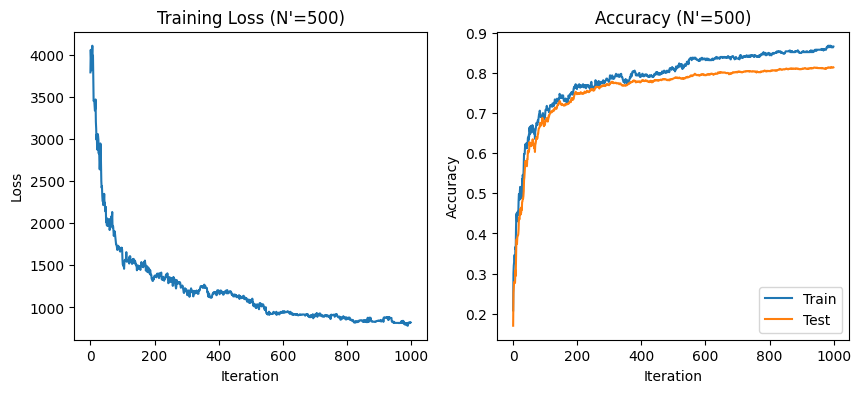

Iteration: 0 Train Loss: 5250.5 Train Accuracy: 34.599999999999994 Test Accuracy: 33.57
Iteration: 100 Train Loss: 2925.5 Train Accuracy: 72.7 Test Accuracy: 70.53
Iteration: 200 Train Loss: 2661.5 Train Accuracy: 75.7 Test Accuracy: 74.65
Iteration: 300 Train Loss: 2587.0 Train Accuracy: 76.7 Test Accuracy: 77.07000000000001
Iteration: 400 Train Loss: 2419.5 Train Accuracy: 78.2 Test Accuracy: 78.09
Iteration: 500 Train Loss: 2377.5 Train Accuracy: 78.5 Test Accuracy: 78.3
Iteration: 600 Train Loss: 2182.0 Train Accuracy: 80.2 Test Accuracy: 79.25999999999999
Iteration: 700 Train Loss: 2209.0 Train Accuracy: 80.0 Test Accuracy: 79.63
Iteration: 800 Train Loss: 2037.5 Train Accuracy: 81.5 Test Accuracy: 79.93
Iteration: 900 Train Loss: 2021.0 Train Accuracy: 82.19999999999999 Test Accuracy: 80.82000000000001


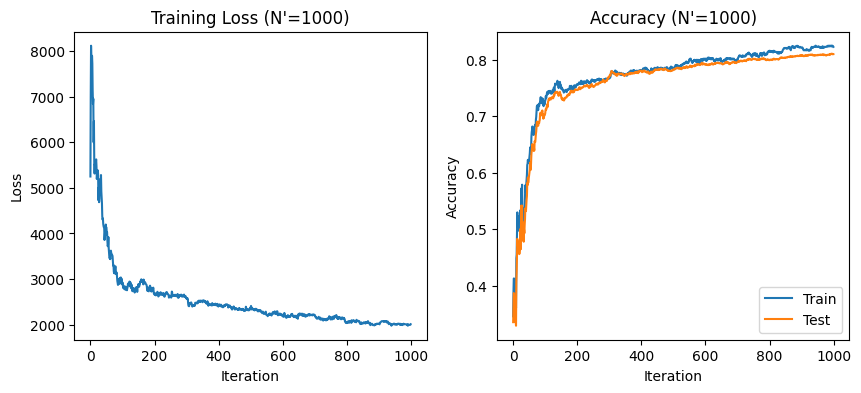

Iteration: 0 Train Loss: 58600.0 Train Accuracy: 33.68 Test Accuracy: 32.82
Iteration: 100 Train Loss: 24510.5 Train Accuracy: 74.37 Test Accuracy: 74.77000000000001
Iteration: 200 Train Loss: 23086.5 Train Accuracy: 76.98 Test Accuracy: 78.32000000000001
Iteration: 300 Train Loss: 22402.0 Train Accuracy: 77.21000000000001 Test Accuracy: 78.74
Iteration: 400 Train Loss: 22081.0 Train Accuracy: 78.49000000000001 Test Accuracy: 79.69000000000001
Iteration: 500 Train Loss: 21087.0 Train Accuracy: 79.06 Test Accuracy: 80.21000000000001
Iteration: 600 Train Loss: 19861.0 Train Accuracy: 80.08 Test Accuracy: 81.16
Iteration: 700 Train Loss: 19497.0 Train Accuracy: 80.35 Test Accuracy: 81.39999999999999
Iteration: 800 Train Loss: 19532.0 Train Accuracy: 80.76 Test Accuracy: 81.78999999999999
Iteration: 900 Train Loss: 19030.0 Train Accuracy: 81.28 Test Accuracy: 82.21000000000001


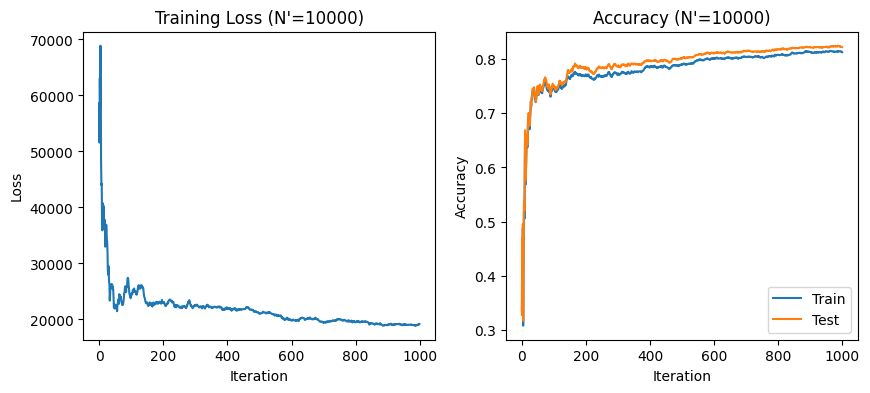

In [65]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()
learning_rate = .001
N_primes = [100, 500, 1000, 10000]
run_for_multiple_subset(X_train, y_train, X_test, y_test, learning_rate, N_primes)

*** Task 5 Answer)*** In Task 5, we reduced the training dataset size. For batch size 100, we trained our linear model for 4 dataset sizes, namely N' = 100, 500, 1000, 10000, with a learning rate of 0.001. From the above observations, we obtained a maximum test accuracy of 82.2% when we trained our model on 10000 dataset size.

***Task6*** (Bonus 5 pts) Simpler Life: Run the linear MNIST classifier with batchsize B = 100 over the full dataset by using PyTorch or Tensorflow. Use same learning rate and initialization W0 = 0. Verify that it is consistent with your handcoded algorithm by comparing your results (the accuracy and training loss plots).

In [74]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

""" Loading and Preprocessing the MNIST dataset:"""
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True, num_workers=2)

test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100, shuffle=False, num_workers=2)


In [75]:
class LinearClassifier(nn.Module):
    def __init__(self):
        super(LinearClassifier, self).__init__()
        self.fc = nn.Linear(784, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc(x)
        return x

model = LinearClassifier()


In [76]:
""" Quadratic Loss"""
criterion = nn.MSELoss()
""" Gradiant decent"""
optimizer = optim.SGD(model.parameters(), lr=0.01)

""" Defining the hyperparameters"""
epochs = 10
batch_size = 100


In [77]:
loss_history = []
accuracy_history = []

for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        """ One Hot Encoding"""
        labels_one_hot = torch.zeros(batch_size, 10)
        labels_one_hot.scatter_(1, labels.view(-1, 1), 1)
        optimizer.zero_grad()

        """ Forward Propagation"""
        outputs = model(inputs)

        """Calculating the loss"""
        loss = criterion(outputs, labels_one_hot)

        """ BackPropagation """
        loss.backward()
        optimizer.step()

        """Updating the loss"""
        running_loss += loss.item()
    
    """ Storing the each loss per itr"""
    loss_history.append(running_loss / (i + 1))
    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}')

    """Calculating the accuracy"""
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    accuracy_history.append(accuracy)
    print(f'Accuracy of the model on the test set: {accuracy}%')


Epoch 1, Loss: 0.0675958835830291
Accuracy of the model on the test set: 80.98%
Epoch 2, Loss: 0.04995077688867847
Accuracy of the model on the test set: 82.77%
Epoch 3, Loss: 0.046840104764948286
Accuracy of the model on the test set: 84.2%
Epoch 4, Loss: 0.04517406469210982
Accuracy of the model on the test set: 84.38%
Epoch 5, Loss: 0.044116995179404817
Accuracy of the model on the test set: 84.42%
Epoch 6, Loss: 0.0433370890840888
Accuracy of the model on the test set: 85.08%
Accuracy of the model on the test set: 85.9%
Epoch 8, Loss: 0.042342118850598735
Accuracy of the model on the test set: 85.22%
Epoch 9, Loss: 0.04196147473839422
Accuracy of the model on the test set: 85.87%
Epoch 10, Loss: 0.04165268015737335
Accuracy of the model on the test set: 85.33%


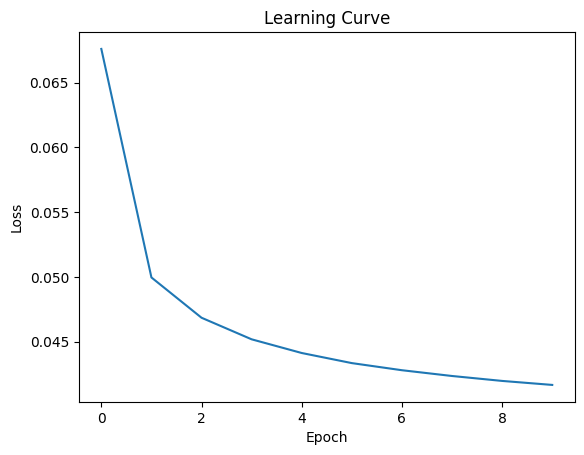

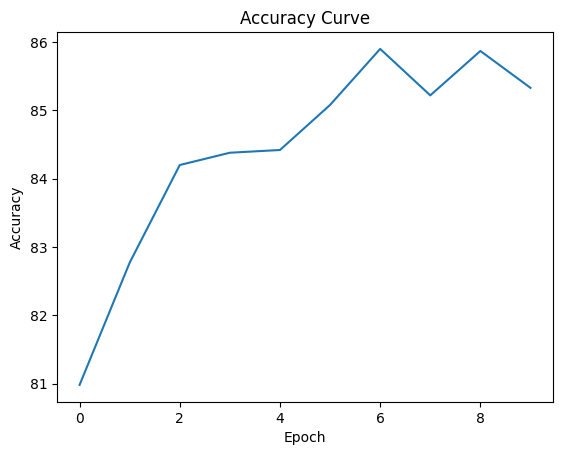

In [78]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.show()

plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.show()


***Task 6 Answer*** From the above observation where I implemented a linear classifier using PyTorch for the MNIST dataset, we can see that we are getting the best accuracy of ***85.33%***. In the case of my hand-coded algorithm, I am getting a maximum ***accuracy of 85.58%***, which concludes that the hand-coded algorithm is consistent with the PyTorch implementation.